In [164]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [165]:
highLumi_data = pd.read_hdf('data_highLumi_pt_250_500.h5')
lowLumi_data = pd.read_hdf('data_lowLumi_pt_250_500.h5')

highLumi_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962


In [166]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [167]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))

In [168]:
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

In [169]:
higgs_data.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118


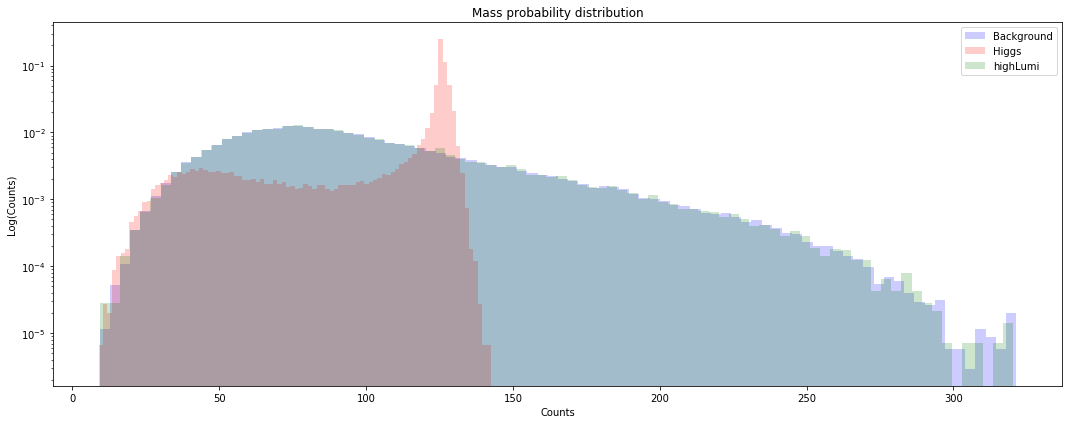

In [170]:
bins = 90; alph = .2 
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_data['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(highLumi_data['mass'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
fig.tight_layout()

So based on Lab 7, it looks like the highLumi data is very similar to the background distribution. Although it is not scaled yet, It seems that a lot of our observed data is background. There is a tiny sliver of green that can be seen around 124 counts. Let's see if we can make cuts to see if that little sliver is actually a signal. 

In [171]:
# Showing that there is a difference within the lengths of the Lumi_data compared to the higgs_data

print("The overall size of the highLumi data is: " + str(len(highLumi_data)))
print("The overall size of the lowLumi data is: " + str(len(lowLumi_data)))
print("The overall size of the qcd and higgs data is: " + str(len(higgs_data)))

The overall size of the highLumi data is: 40344
The overall size of the lowLumi data is: 4060
The overall size of the qcd and higgs data is: 100000


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


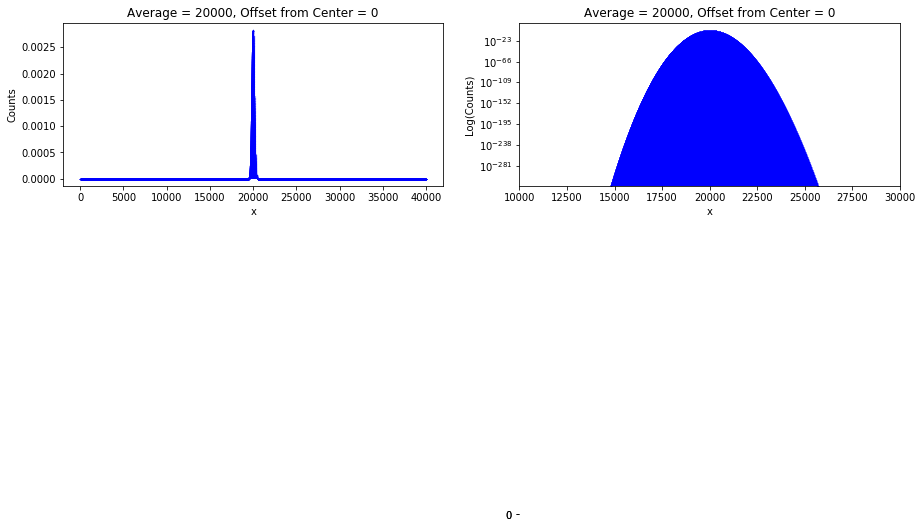

In [172]:
mu = 20000; sigma = 0; siz = 100000
distro = stats.poisson.rvs(mu, sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15,3))
                          
ax.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x = np.linspace(0, 2*mu, 2*mu+1)
ax.plot(x,stats.poisson.pmf(x,mu,sigma), 'b.', ms=.5, alpha = .5)
ax.vlines(x, 0, stats.poisson.pmf(x, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured = np.linspace(0, 100, 101)
ax.fill_between(measured, stats.poisson.pmf(measured, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax.set_xlabel('x')
ax.set_ylabel('Counts')

ax1.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x1 = np.linspace(0, 2*mu, 2*mu+1)
ax1.plot(x1, stats.poisson.pmf(x1,mu,sigma), 'b.', ms=.5, alpha = .5)
ax1.vlines(x1, 0, stats.poisson.pmf(x1, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured1 = np.linspace(0, 100, 101)
ax1.fill_between(measured1, stats.poisson.pmf(measured1, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax1.set_xlabel('x')
ax1.set_xlim([10000, 30000])
ax1.set_ylabel('Log(Counts)')
ax1.set_yscale('log')

prob = 1 - stats.poisson.cdf(100, mu, sigma)
z = (stats.norm.ppf(1-(prob)))

print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

I have already done this in Lab 7 and found where the mass and ktdeltar can remove almost all of the background. I can now apply this to the Lumi data in order to try to find a 5 sigma value. These two data sets, high and low lumi, have been simulated as a real collection at the LHC. Those cuts that I have made I can now apply to this new daya to see if I can get a 5$\sigma$ signal. This can then be re-applied to the training set in Lab 7 for further analysis. 

In [173]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.99 < mass < 125.012 and d2 < 2.2')
higgs_data_mass_cut = higgs_data.query(f' 124.99 < mass < 125.012 and d2 < 2.2')
highLumi_cut = highLumi_data.query(f' 124.99 < mass < 125.012 and d2 < 2.2')
lowLumi_cut = lowLumi_data.query(f' 124.99 < mass < 125.012 and d2 < 2.2')


background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
highLumi_percentage = len(highLumi_cut)/len(highLumi_data)
lowLumi_percentage = len(lowLumi_cut)/len(lowLumi_data)

print(f' Percent cut from background data: {(1 - background_cut)*100:.7f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')
print(f' Percent cut from highLumi data: {(1 - highLumi_percentage)*100:.4f}%')
print(f' Percent cut from lowLumi data: {(1 - lowLumi_percentage)*100:.4f}%')

 Percent cut from background data: 99.9950000%
 Percent cut from higgs data: 96.6470%
 Percent cut from highLumi data: 99.9777%
 Percent cut from lowLumi data: 100.0000%


It looks like all the lowLumi data was removed when making cuts. So it seems that there are no higgs particles ot be overseved within the low Lumi data. I will also verify this below, too. 

#### High Lumi Data Analysis

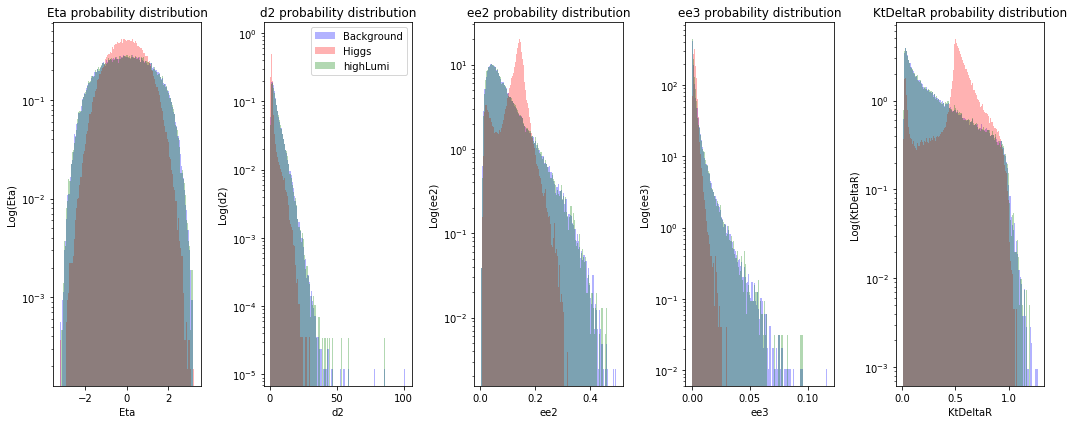

In [174]:
bins = 120; alph = .3
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (15, 6))
ax.hist(qcd_background_data['eta'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['eta'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(highLumi_data['eta'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax.set_yscale('log')
ax.set_title('Eta probability distribution') 
ax.set_xlabel('Eta')
ax.set_ylabel('Log(Eta)')
fig.tight_layout()

ax1.hist(qcd_background_data['d2'], bins, alpha = alph, density = True, color='b', label='Background')
ax1.hist(higgs_data['d2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax1.hist(highLumi_data['d2'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax1.set_yscale('log')
ax1.set_title('d2 probability distribution') 
ax1.set_xlabel('d2')
ax1.set_ylabel('Log(d2)')
ax1.legend()
fig.tight_layout()
              
ax2.hist(qcd_background_data['ee2'], bins, alpha = alph, density = True, color='b', label='Background')
ax2.hist(higgs_data['ee2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax2.hist(highLumi_data['ee2'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax2.set_yscale('log')
ax2.set_title('ee2 probability distribution') 
ax2.set_xlabel('ee2')
ax2.set_ylabel('Log(ee2)')
fig.tight_layout()
              
ax3.hist(qcd_background_data['ee3'], bins, alpha = alph, density = True, color='b', label='Background')
ax3.hist(higgs_data['ee3'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax3.hist(highLumi_data['ee3'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax3.set_yscale('log')
ax3.set_title('ee3 probability distribution') 
ax3.set_xlabel('ee3')
ax3.set_ylabel('Log(ee3)')
fig.tight_layout()

ax4.hist(qcd_background_data['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Background')
ax4.hist(higgs_data['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax4.hist(highLumi_data['KtDeltaR'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax4.set_yscale('log')
ax4.set_title('KtDeltaR probability distribution') 
ax4.set_xlabel('KtDeltaR')
ax4.set_ylabel('Log(KtDeltaR)')
fig.tight_layout()

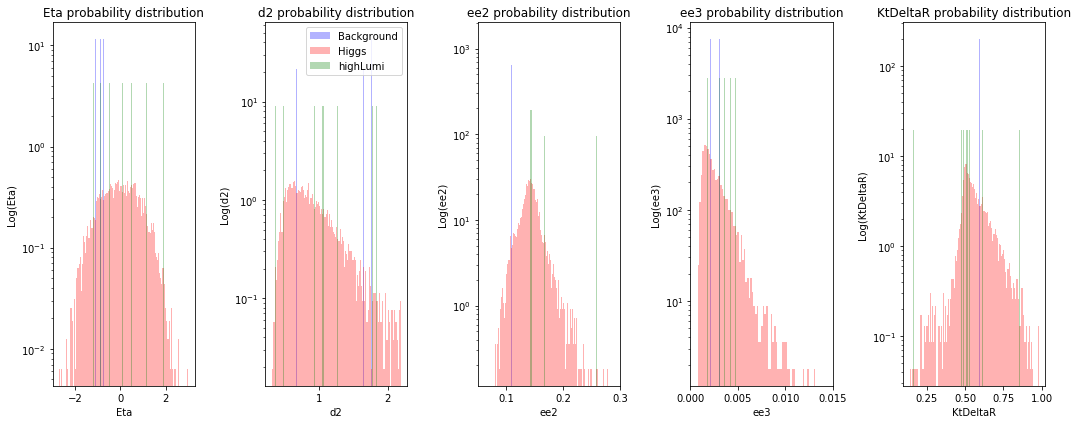

In [175]:
bins = 120; alph = .3 
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['eta'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['eta'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(highLumi_cut['eta'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax.set_yscale('log')
ax.set_title('Eta probability distribution') 
ax.set_xlabel('Eta')
ax.set_ylabel('Log(Eta)')
fig.tight_layout()

ax1.hist(qcd_background_mass_cut['d2'], bins, alpha = alph, density = True, color='b', label='Background')
ax1.hist(higgs_data_mass_cut['d2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax1.hist(highLumi_cut['d2'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax1.set_yscale('log')
ax1.set_title('d2 probability distribution') 
ax1.set_xlabel('d2')
ax1.set_ylabel('Log(d2)')
ax1.legend()
fig.tight_layout()
              
ax2.hist(qcd_background_mass_cut['ee2'], bins, alpha = alph, density = True, color='b', label='Background')
ax2.hist(higgs_data_mass_cut['ee2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax2.hist(highLumi_cut['ee2'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax2.set_yscale('log')
ax2.set_title('ee2 probability distribution') 
ax2.set_xlabel('ee2')
ax2.set_ylabel('Log(ee2)')
ax2.set_xlim([.05, .3])

              
ax3.hist(qcd_background_mass_cut['ee3'], bins, alpha = alph, density = True, color='b', label='Background')
ax3.hist(higgs_data_mass_cut['ee3'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax3.hist(highLumi_cut['ee3'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax3.set_yscale('log')
ax3.set_title('ee3 probability distribution') 
ax3.set_xlabel('ee3')
ax3.set_ylabel('Log(ee3)')
ax3.set_xlim([0, .015])

ax4.hist(qcd_background_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Background')
ax4.hist(higgs_data_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax4.hist(highLumi_cut['KtDeltaR'], bins, alpha = alph, density = True, color='g', label='highLumi')
ax4.set_yscale('log')
ax4.set_title('KtDeltaR probability distribution') 
ax4.set_xlabel('KtDeltaR')
ax4.set_ylabel('Log(KtDeltaR)')
fig.tight_layout()

In [177]:
prob = 1 - stats.poisson.cdf(len(highLumi_cut), 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.10f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

The probability that a signal will be falsely recorded as a background: 0.0000001114
Sigma value for the above percentage is: 5.1792


For the given mass and d2 cuts, I has able to achieve a significance of for the high Lumi data at a sigma value of 5.17924$\sigma$. This is also assuming that te data is already normalized to a single set of data. 

#### Low Lumi Data

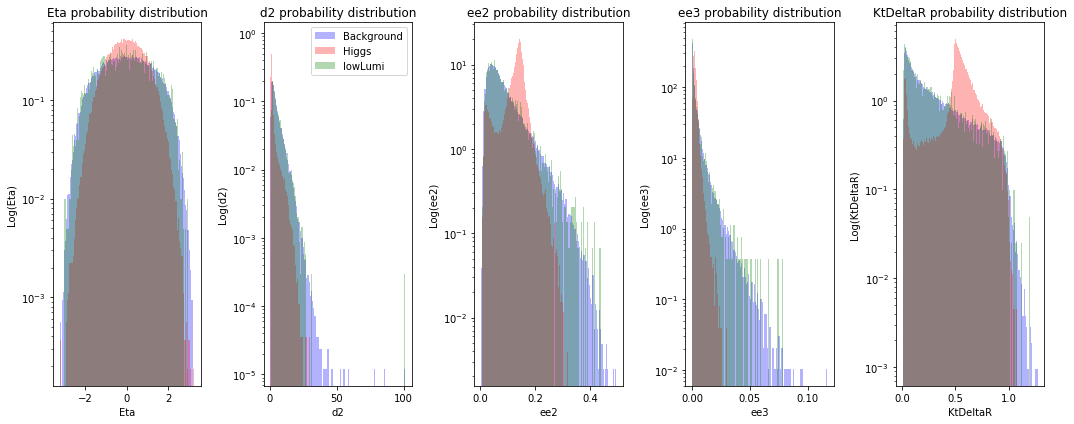

In [178]:
bins = 120; alph = .3
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (15, 6))
ax.hist(qcd_background_data['eta'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['eta'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(lowLumi_data['eta'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax.set_yscale('log')
ax.set_title('Eta probability distribution') 
ax.set_xlabel('Eta')
ax.set_ylabel('Log(Eta)')
fig.tight_layout()

ax1.hist(qcd_background_data['d2'], bins, alpha = alph, density = True, color='b', label='Background')
ax1.hist(higgs_data['d2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax1.hist(lowLumi_data['d2'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax1.set_yscale('log')
ax1.set_title('d2 probability distribution') 
ax1.set_xlabel('d2')
ax1.set_ylabel('Log(d2)')
ax1.legend()
fig.tight_layout()
              
ax2.hist(qcd_background_data['ee2'], bins, alpha = alph, density = True, color='b', label='Background')
ax2.hist(higgs_data['ee2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax2.hist(lowLumi_data['ee2'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax2.set_yscale('log')
ax2.set_title('ee2 probability distribution') 
ax2.set_xlabel('ee2')
ax2.set_ylabel('Log(ee2)')
fig.tight_layout()
              
ax3.hist(qcd_background_data['ee3'], bins, alpha = alph, density = True, color='b', label='Background')
ax3.hist(higgs_data['ee3'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax3.hist(lowLumi_data['ee3'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax3.set_yscale('log')
ax3.set_title('ee3 probability distribution') 
ax3.set_xlabel('ee3')
ax3.set_ylabel('Log(ee3)')
fig.tight_layout()

ax4.hist(qcd_background_data['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Background')
ax4.hist(higgs_data['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax4.hist(lowLumi_data['KtDeltaR'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax4.set_yscale('log')
ax4.set_title('KtDeltaR probability distribution') 
ax4.set_xlabel('KtDeltaR')
ax4.set_ylabel('Log(KtDeltaR)')
fig.tight_layout()

/Users/mphenicie/Enter/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


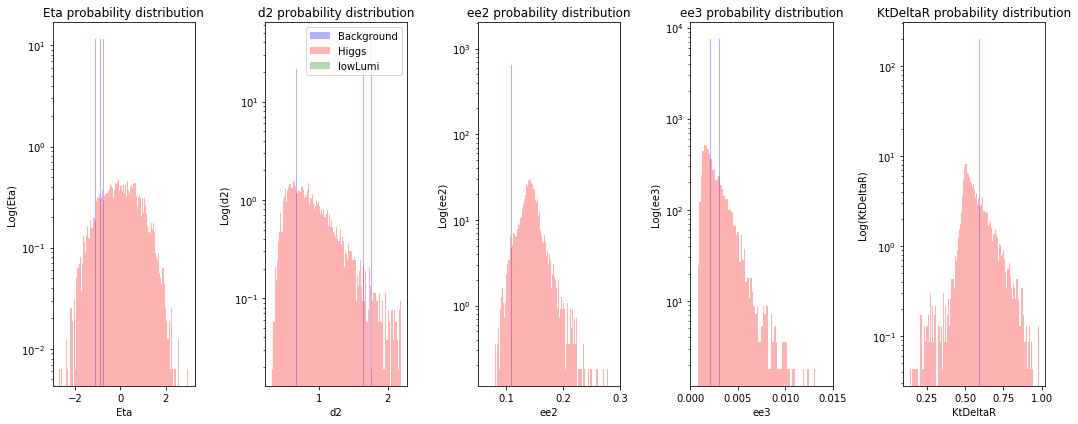

In [179]:
bins = 120; alph = .3 
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['eta'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['eta'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.hist(lowLumi_cut['eta'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax.set_yscale('log')
ax.set_title('Eta probability distribution') 
ax.set_xlabel('Eta')
ax.set_ylabel('Log(Eta)')
fig.tight_layout()

ax1.hist(qcd_background_mass_cut['d2'], bins, alpha = alph, density = True, color='b', label='Background')
ax1.hist(higgs_data_mass_cut['d2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax1.hist(lowLumi_cut['d2'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax1.set_yscale('log')
ax1.set_title('d2 probability distribution') 
ax1.set_xlabel('d2')
ax1.set_ylabel('Log(d2)')
ax1.legend()
fig.tight_layout()
              
ax2.hist(qcd_background_mass_cut['ee2'], bins, alpha = alph, density = True, color='b', label='Background')
ax2.hist(higgs_data_mass_cut['ee2'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax2.hist(lowLumi_cut['ee2'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax2.set_yscale('log')
ax2.set_title('ee2 probability distribution') 
ax2.set_xlabel('ee2')
ax2.set_ylabel('Log(ee2)')
ax2.set_xlim([.05, .3])

              
ax3.hist(qcd_background_mass_cut['ee3'], bins, alpha = alph, density = True, color='b', label='Background')
ax3.hist(higgs_data_mass_cut['ee3'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax3.hist(lowLumi_cut['ee3'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax3.set_yscale('log')
ax3.set_title('ee3 probability distribution') 
ax3.set_xlabel('ee3')
ax3.set_ylabel('Log(ee3)')
ax3.set_xlim([0, .015])

ax4.hist(qcd_background_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Background')
ax4.hist(higgs_data_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax4.hist(lowLumi_cut['KtDeltaR'], bins, alpha = alph, density = True, color='g', label='lowLumi')
ax4.set_yscale('log')
ax4.set_title('KtDeltaR probability distribution') 
ax4.set_xlabel('KtDeltaR')
ax4.set_ylabel('Log(KtDeltaR)')
fig.tight_layout()

In [180]:
prob = 1 - stats.poisson.cdf(len(lowLumi_cut), 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.10f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

The probability that a signal will be falsely recorded as a background: 0.6321205588
Sigma value for the above percentage is: -0.3375


Here, we notice that the Low Lumi data does not reach the 5 sigma threshold, so we can then conclude that there is an extremely small possibility of being a higgs signal within this dataset. This is further confirming our cuts that we had made previously where 100% of the Low Lumi data was disregarded after we made cuts. 

### Upper Limits

As we found above, the Low Lumi data was not significant. Therefore, we can use teh data as a background distribution to find the upper limit case. The whole point of an upper limit is to say that because of an insignificant signal, we have the information to say that we are 95% certain that the signal could not have been greater than some value

Upper limits can be found by injecting signal. Then we can determine at what signal does the background distribution make an observed signal appear to be greater than what was actually observed at a probability of 95%. We have worked with injecting data in previous labs by creating a distribution of potential 'true signals', then guessing and checking different values. This guessing and checking would end once we found an integral with an observed value equal to .95 or 95% to the right of the observed value. 

I will try to inject my own signals by changing the different offsets of the background distribution, in this case the low Lumi data. This is equivalent to varying the injected values within the true signal

In [222]:
## Background data

off = 3.3
prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, off)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a true signal of {off} creates an observed signal greater than the counted signal recorded as a background: {prob*100:.4f}%')
print("")
off = 3.353
prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, off)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a true signal of {off} creates an observed signal greater than the counted signal recorded as a background: {prob*100:.4f}%')

The probability that a true signal of 3.3 creates an observed signal greater than the counted signal recorded as a background: 63.2121%

The probability that a true signal of 3.353 creates an observed signal greater than the counted signal recorded as a background: 100.0000%


With just our qcd and higgs data, the upper limit for our observation was 3.353 because if a true signal was larger than 3.53, there would be a 100% probability that it would show up as a greater value than what we observed.

In [229]:
## Low Lumi Data

off = 0
prob = 1 - stats.poisson.cdf(0, len(lowLumi_data)*lowLumi_percentage, off)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a true signal of {off} creates an observed signal greater than the counted signal recorded as a background: {prob*100:.4f}%')
print("")
off = .1
prob = 1 - stats.poisson.cdf(0, len(lowLumi_data)*lowLumi_percentage, off)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a true signal of {off} creates an observed signal greater than the counted signal recorded as a background: {prob*100:.4f}%')
print("")

The probability that a true signal of 0 creates an observed signal greater than the counted signal recorded as a background: 0.0000%

The probability that a true signal of 0.1 creates an observed signal greater than the counted signal recorded as a background: 100.0000%



For the low lumi data, we get an upper limit of .1. If the true signal was bigger than that, it will have a 100% chance of being a value that is greater than what we observed

We are dealing with very small datasets and finding the 1$\sigma$ value would be extremely hard considering I had already made such severe cuts in my data. Therefore, it would be hard to find the upper limit as my data is pretty dry at this point. If I were to find the 1$\sigma$ upper limit, I would not yield accurate results because of how tight my statistics and analysis are. If I were to be given a larger dataset which would consist of more background data with a Poission distribution, then I wouldn't get such a narrow window to find my signal from. Therefore, when asking the question of finding the upper limit actually would not be a good question to ask. One might hypothesis how much more data would be necessary to actually yield meaningful 1$\sigma$ results. 

This experiment was awesome in giving me a real world approach to how to analyze and make cuts for large amounts of datasets. I have a new appreciation for what goes into finding signals from a whole bunch of data and I know I have only scratched the surface. The Higgs Boson requires a lot of data and precise cuts to actually yield meaningful results. 

In [ ]:
This was an awesome quarter and I learned 